In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRFRegressor
from math import sqrt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
#!pip install xgboost

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
#taking duplicate
bos = df.copy()

In [8]:
#dtypes
bos.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [9]:
#Checking null values in dataset
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [10]:
#Descriptive stats
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


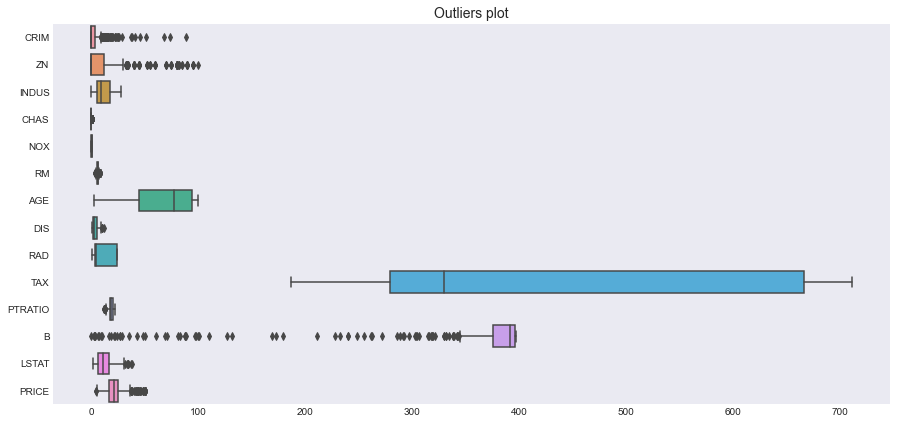

In [11]:
## visulisation of  outliers in data
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']= (15, 9)
fig = plt.figure(figsize = (15, 7))
ax = sns.boxplot(data = bos, orient='h')
plt.title('Outliers plot', fontsize = 14)
plt.show()

In [12]:
#spliting independent and dependent variabels
x = bos.iloc[:,:-1]
y = bos.iloc[:,-1]

In [13]:
#splitting train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [14]:
xg= XGBRFRegressor()
xg.fit(x_train, y_train)
predictions_xg = xg.predict(x_test)
mse = mean_squared_error(y_test, predictions_xg)
print("Mean square error with XGBRFRegressor:",mse)
rmse = sqrt(mse)
print("Root Mean square error with XGBRFRegressor:",rmse)
mae = mean_absolute_error(y_test, predictions_xg)
print("Mean absolute error with XGBRFRegressor :",mae)
#r2_score = r2_score(y_test, predictions_xg)
#print("r2 score with XGBRFRegressor :",r2_score)

Mean square error with XGBRFRegressor: 9.992627801595201
Root Mean square error with XGBRFRegressor: 3.161111798338553
Mean absolute error with XGBRFRegressor : 2.1618916367229666


In [15]:
#cross checking model predictions prices with actual prices
cr_pr = pd.DataFrame({'Actual':y_test, 'Predicted':predictions_xg})
cr_pr

,Actual,Predicted
173,23.6,22.138304
274,32.4,30.225302
491,13.6,15.639324
72,22.8,23.419481
452,16.1,17.293272
...,...,...
441,17.1,13.242244
23,14.5,15.928039
225,50.0,41.306290
433,14.3,15.606644


In [16]:
#lets check strength btw actual and predicted prices
cr_pr.corr()

,Actual,Predicted
Actual,1.00000,0.93201
Predicted,0.93201,1.00000


Good sign..! There is healthy correlation with Actual and predictions prices(93.2%) which means model predictions are approximetly accurate as actual.

In [17]:
# Calculate the absolute errors
errors = abs(predictions_xg - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 2.16 degrees.
Accuracy: 88.63 %.


C:\Users\Krishna Vamshi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Krishna Vamshi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


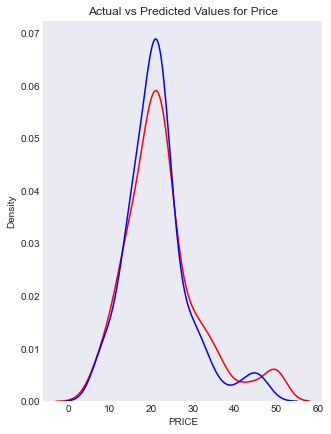

In [18]:
#Let’s plot the difference between the actual and the predicted value.
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(predictions_xg, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Predicted Values for Price')


plt.show()
plt.close()

In [19]:
rf = RandomForestRegressor(n_estimators = 1200, random_state = 42)
rf.fit(x_train, y_train)
predictions_rf = rf.predict(x_test)
mse = mean_squared_error(y_test, predictions_rf)
print("Mean square error with random forest :",mse)
rmse = sqrt(mse)
print("Root Mean square error with random forest :",rmse)
mae = mean_absolute_error(y_test, predictions_rf)
print("Mean absolute error with random forest :",mae)
r2_score = r2_score(y_test, predictions_rf)
print("r2 score with random forest :", r2_score)

Mean square error with random forest : 9.237938707510967
Root Mean square error with random forest : 3.039397754080727
Mean absolute error with random forest : 2.0750493421052654
r2 score with random forest : 0.8760226153925254


In [21]:
#rf.predict([[0.00632,18.0,2.31,0.0,0.538,6.575,4.98]])

In [22]:
# Calculate the absolute errors using random forest model
errors = abs(predictions_rf - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 2.08 degrees.
Accuracy: 89.1 %.


In [23]:
#cross checking model predictions prices with actual prices
cr_pr_rf = pd.DataFrame({'Actual':y_test, 'Predicted':predictions_rf})
cr_pr_rf

,Actual,Predicted
173,23.6,22.809417
274,32.4,31.120917
491,13.6,16.310833
72,22.8,23.842917
452,16.1,17.217250
...,...,...
441,17.1,13.560417
23,14.5,15.082750
225,50.0,43.086667
433,14.3,15.608500


In [24]:
cr_pr_rf.corr()

,Actual,Predicted
Actual,1.000000,0.936525
Predicted,0.936525,1.000000


Good sign..! There is healthy correlation with Actual and predictions prices(93.6%) which means model predictions are approximetly accurate as actual but there is slight good scores comparing with XG BOOST model.

C:\Users\Krishna Vamshi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Krishna Vamshi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


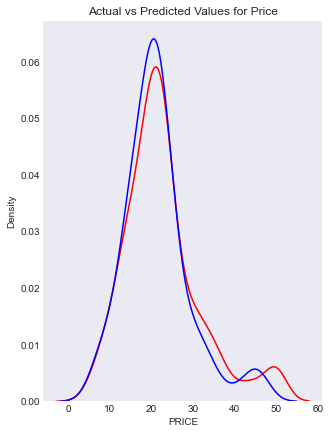

In [25]:
#Let’s plot the difference between the actual and the predicted value.
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(predictions_rf, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Predicted Values for Price')


plt.show()
plt.close()

In [26]:
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
mse = mean_squared_error(y_test, predictions_lr)
print("Mean square error with linear regressor :",mse)
rmse = sqrt(mse)
print("Root Mean square error with linear regressor:",rmse)
mae = mean_absolute_error(y_test, predictions_lr)
print("Mean absolute error with linear regressor :",mae)
#r2_score = r2_score(y_test, predictions_lr)
#print("r2 score with random forest :", r2_score)

Mean square error with linear regressor : 21.517444231177432
Root Mean square error with linear regressor: 4.6386899261728445
Mean absolute error with linear regressor : 3.1627098714574253


In [27]:
# Calculate the absolute errors
errors = abs(predictions_lr - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.16 degrees.
Accuracy: 83.48 %.


In [28]:
bos.shape

(506, 14)

In [29]:
svr= SVR()
svr.fit(x_train, y_train)
predictions_svr = svr.predict(x_test)
mse = mean_squared_error(y_test, predictions_svr)
print("Mean square error with svr  :",mse)
rmse = sqrt(mse)
print("Root Mean square error with svr:",rmse)
mae = mean_absolute_error(y_test, predictions_svr)
print("Mean absolute error with  svr :",mae)

Mean square error with svr  : 53.50370874750567
Root Mean square error with svr: 7.31462293953049
Mean absolute error with  svr : 4.730064192072545


In [30]:
# Calculate the absolute errors
errors = abs(predictions_svr - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 4.73 degrees.
Accuracy: 76.82 %.


In [31]:
#cross validating
cv_xg = cross_val_score(xg, x, y, cv = 2)
print(cv_xg)
print("XG_booster:",cv_xg.mean())

[0.82688938 0.65333272]
XG_booster: 0.7401110470645855


In my above approch I just splitted the data and builded my model thats it.

I didn't treated any outliers nor any missing values, didn't perfomed any feature engineering, feature selection etc etc..


Didn't do any hypermeter tuning either to the model.

 But still model perfomed quite good gave some good score, Accuracy: 88.63 %(with XG boost) and 89.07%(with Random forest).


So we can improve our model by appling some feature engineering and feature selection methods.Lets see how our model will perform after that techniques.


### Feature Scaling

#### checking correlation 

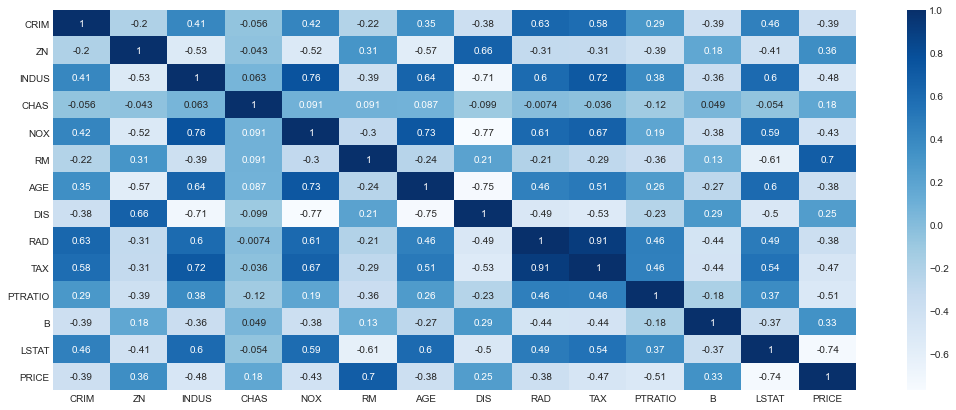

In [32]:
f= plt.figure(figsize=(18,7))
corr = bos.corr()
ax = sns.heatmap(corr, cmap = 'Blues', annot= True)

From the above heat map , we can see that variabels "Zn", "CHAS", "RM", "DIS", "B" are positively correlated to target.

"CRIM", "INDUS", "NOX", "AGE", "RAD", "TAX", "PTRATIO", "LSTAT" are negatively correlated to target.

In [ ]:
#Lets check the multi-colinearty btw variabels in positively and negatively

corr_new = corr.where(np.triu(np.ones(corr.shape),k = 1).astype(np.bool))
corr_new = corr_new.unstack().transpose().sort_values(ascending = False).dropna()

corr_new = corr_new[(corr_new > 0.9)|(corr_new < -0.9)] #checking above +0.7 and below -0.7
corr_new

In [ ]:
#second method to check the multicolinearty

import statsmodels.api as sm
add_constant = sm.add_constant(x)
add_constant


In [ ]:
## fit a OLS model with intercept on TV and Radio

model= sm.OLS(y, add_constant).fit()
model.summary()

As of now I'm going with correlation method for give my assumptions of data on multi-colinearty.
As you can see variabels "Tax" and "Rad" having strong relationship(91.2%), which means both variabels are giving same kind of info to predict target. Here we have two ways to r
treat the multi-colinearty. 1. Simply ignoring them 2. Drop one of them.
If we go with option 2 we might get confuse to which variable to drop. Here we have one solution just observe the  coefficeint, Standerd error and p values from the above summary.

    coef	std err	 t	   P>|t|	[0.025	0.975]
RAD	0.3060	0.066	4.613	0.000	0.176	0.436


TAX	-0.0123	0.004	-3.280	0.001	-0.020	-0.005

when you see "TAX" coeffient value is in negative and p-value is high compare to "RAD" which is very bad sign.So we have to pick the worst one so we will go with "TAX".



But here I'm just ignoring the multicolinearty beacause, random forest model gave me the best scores than linear regression model.

There are no assumptions to check on data when your dealing with tree based models. But there are some assumptions when we are going with linear regression model like 1. Normally distributed 2.No multi-colinearty 3. Homoscedasticity etc...


But I'm gonna do some feature scaling on the data ,may be we can increase the model perfomance by doing that stuff.

#First I gonna train the data by variabels which positively co-related with target
#"Zn", "CHAS", "RM", "DIS", "B" are positively correlated to target.

In [ ]:
bos1 = bos[["ZN", "CHAS", "RM", "DIS", "B", "PRICE"]].reset_index()
bos1 = bos1.drop(['index'], axis=1)
bos1.head()

In [ ]:
#feature engineering
from sklearn.preprocessing import MinMaxScaler
def scaling_features(data):
    """
        INPUT:
            data - Columns to be transformed
            
        OUTPUT:
            featurs_final - Transformed columns
    
    """
    scaler = MinMaxScaler()
    features = ["ZN", "CHAS", "RM", "DIS", "B"]
    features_minmax_transform = pd.DataFrame(data = data)
    features_minmax_transform[features] = scaler.fit_transform(data[features])
    return features_minmax_transform

In [ ]:
bos1 = scaling_features(bos1)
bos1.head()

In [ ]:
x1 = bos1.iloc[:,:-1]
y1 = bos1.iloc[:,-1]

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = 42)

In [ ]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(x1_train, y1_train)
predictions_rf = rf.predict(x1_test)
mse = mean_squared_error(y1_test, predictions_rf)
print("Mean square error with random forest :",mse)
rmse = sqrt(mse)
print("Root Mean square error with random forest :",rmse)
mae = mean_absolute_error(y_test, predictions_rf)
print("Mean absolute error with random forest :",mae)


In [ ]:
# Calculate the absolute errors
errors = abs(predictions_rf - y1_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y1_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
lr = LinearRegression()
lr.fit(x1_train, y1_train)
predictions_lr = lr.predict(x1_test)
mse = mean_squared_error(y1_test, predictions_lr)
print("Mean square error with linear regressor :",mse)
rmse = sqrt(mse)
print("Root Mean square error with linear regressor:",rmse)
mae = mean_absolute_error(y_test, predictions_lr)
print("Mean absolute error with linear regressor :",mae)

So when we trained the model with variabels which are only positively correlated with target and the results are not like we expected, actually scores are increased when comparing with the scores of total data model values. I think the model need both variabels(+VE and -VE) to give accurate results and its waste of time doing with negative variabels.

And I'm gonna try another feature selection technique to improve my the model perfomance scores. Lets try:

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
fs_model = ExtraTreesRegressor()
fs_model.fit(x,y)

In [ ]:
print(fs_model.feature_importances_) 

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(fs_model.feature_importances_, index=x.columns)
feat_importances.nlargest(40).plot(kind='barh')
plt.show()


On applying the Extraregressor to data we got some important features. Now I'm gonna train another model with these important features. Lets see:

In [ ]:
bos2 = bos[["PTRATIO","TAX", "CRIM", "NOX", "INDUS", "RM", "LSTAT", "PRICE"]].reset_index()
bos2 = bos2.drop(['index'], axis=1)
bos2.head()

In [ ]:
x2 = bos2.iloc[:,:-1]
y2 = bos2.iloc[:,-1]

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.3, random_state = 42)

In [ ]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(x2_train, y2_train)
predictions_rf = rf.predict(x2_test)
mse = mean_squared_error(y2_test, predictions_rf)
print("Mean square error with random forest :",mse)
rmse = sqrt(mse)
print("Root Mean square error with random forest :",rmse)
mae = mean_absolute_error(y_test, predictions_rf)
print("Mean absolute error with random forest :",mae)


Nothing happend positively when we are doing feature scaling to data so better we should keep all the features that means all the features are important to predict target.  